In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('student.csv')

In [35]:
df['sex'] = df['sex'].replace({'F': 0, 'M': 1})
df['Pstatus'] = df['Pstatus'].replace({'A': 0, 'T': 1})

In [36]:
selected_columns_D = ['sex', 'age', 'Pstatus', 'famrel', 'Medu', 'Mjob', 'Fedu', 'Fjob', 'goout', 'health', 'Dalc']
# selected_columns_W = ['sex', 'age', 'Pstatus', 'famrel', 'Medu', 'Mjob', 'Fedu', 'Fjob', 'Walc']

df_D = df[selected_columns_D].copy()
# df_W = df[selected_columns_W].copy()


In [37]:
df_D['Dalc'] = df_D['Dalc'].astype(str)
print(df_D.dtypes)
df_D.to_csv('df_D.csv')

sex         int64
age         int64
Pstatus     int64
famrel      int64
Medu        int64
Mjob       object
Fedu        int64
Fjob       object
goout       int64
health      int64
Dalc       object
dtype: object


In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

X = df_D[['sex', 'age', 'Pstatus', 'famrel', 'Medu', 'Mjob', 'Fedu', 'Fjob', 'goout', 'health']]
X = pd.get_dummies(X, columns=['Mjob', 'Fjob'])

y = df_D['Dalc']


In [39]:
X

,sex,age,Pstatus,famrel,Medu,Fedu,goout,health,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher
0,0,18,0,4,4,4,4,3,True,False,False,False,False,False,False,False,False,True
1,0,17,1,5,1,1,3,3,True,False,False,False,False,False,False,True,False,False
2,0,15,1,4,1,1,2,3,True,False,False,False,False,False,False,True,False,False
3,0,15,1,3,4,2,2,5,False,True,False,False,False,False,False,False,True,False
4,0,16,1,4,3,3,2,5,False,False,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,0,19,1,5,2,3,2,5,False,False,False,True,False,False,False,True,False,False
1040,0,18,1,4,3,1,4,1,False,False,False,False,True,False,False,False,True,False
1041,0,18,1,1,1,1,1,5,False,False,True,False,False,False,False,True,False,False
1042,1,17,1,2,3,1,5,2,False,False,False,True,False,False,False,False,True,False


In [40]:
from sklearn.utils import Bunch

dataset = {
    'data': X,
    'target': y,
    'DESCR': 'Student alcohol consumption during weekday',
    'feature_names': ['sex', 'age', 'Pstatus', 'famrel', 'Medu', 'Fedu', 'goout', 'health'
                      'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
                      'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher'],
    'target_names': ['very low', 'low', 'moderate', 'high', 'very high'],
}

bunch = Bunch(**dataset)

X = bunch.data
y = bunch.target

feature_names = bunch.feature_names
class_names = bunch.target_names

In [41]:
from sklearn.model_selection import GridSearchCV
param_grid = { 
    'n_estimators': [25, 50, 100, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9], 
    'max_leaf_nodes': [3, 6, 9], 
} 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
grid_search = GridSearchCV(RandomForestClassifier(), 
                           param_grid=param_grid) 
grid_search.fit(X_train, y_train) 
print(grid_search.best_estimator_) 

KeyboardInterrupt: 

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(criterion='log_loss', max_depth=12, max_leaf_nodes=9, max_features=None, n_estimators=200, class_weight='balanced', bootstrap=True, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("accuracy:", acc) #0.722488038277512

accuracy: 0.5645933014354066


[Text(0.58, 0.9, 'Fjob_health <= 0.5\ngini = 0.467\nsamples = 541\nvalue = [582, 173, 51, 15, 14]\nclass = very low'),
 Text(0.32, 0.7, 'sex <= 0.5\ngini = 0.472\nsamples = 519\nvalue = [557, 172, 47, 15, 14]\nclass = very low'),
 Text(0.16, 0.5, 'Fjob_other <= 0.5\ngini = 0.323\nsamples = 276\nvalue = [336, 64, 9, 5, 2]\nclass = very low'),
 Text(0.08, 0.3, 'Fedu <= 1.5\ngini = 0.392\nsamples = 117\nvalue = [133, 33, 7, 1, 2]\nclass = very low'),
 Text(0.04, 0.1, 'gini = 0.536\nsamples = 22\nvalue = [20, 10, 2, 0, 1]\nclass = very low'),
 Text(0.12, 0.1, 'gini = 0.348\nsamples = 95\nvalue = [113, 23, 5, 1, 1]\nclass = very low'),
 Text(0.24, 0.3, 'Mjob_teacher <= 0.5\ngini = 0.268\nsamples = 159\nvalue = [203, 31, 2, 4, 0]\nclass = very low'),
 Text(0.2, 0.1, 'gini = 0.243\nsamples = 150\nvalue = [198, 29, 0, 3, 0]\nclass = very low'),
 Text(0.28, 0.1, 'gini = 0.66\nsamples = 9\nvalue = [5, 2, 2, 1, 0]\nclass = very low'),
 Text(0.48, 0.5, 'Mjob_services <= 0.5\ngini = 0.589\nsamples 

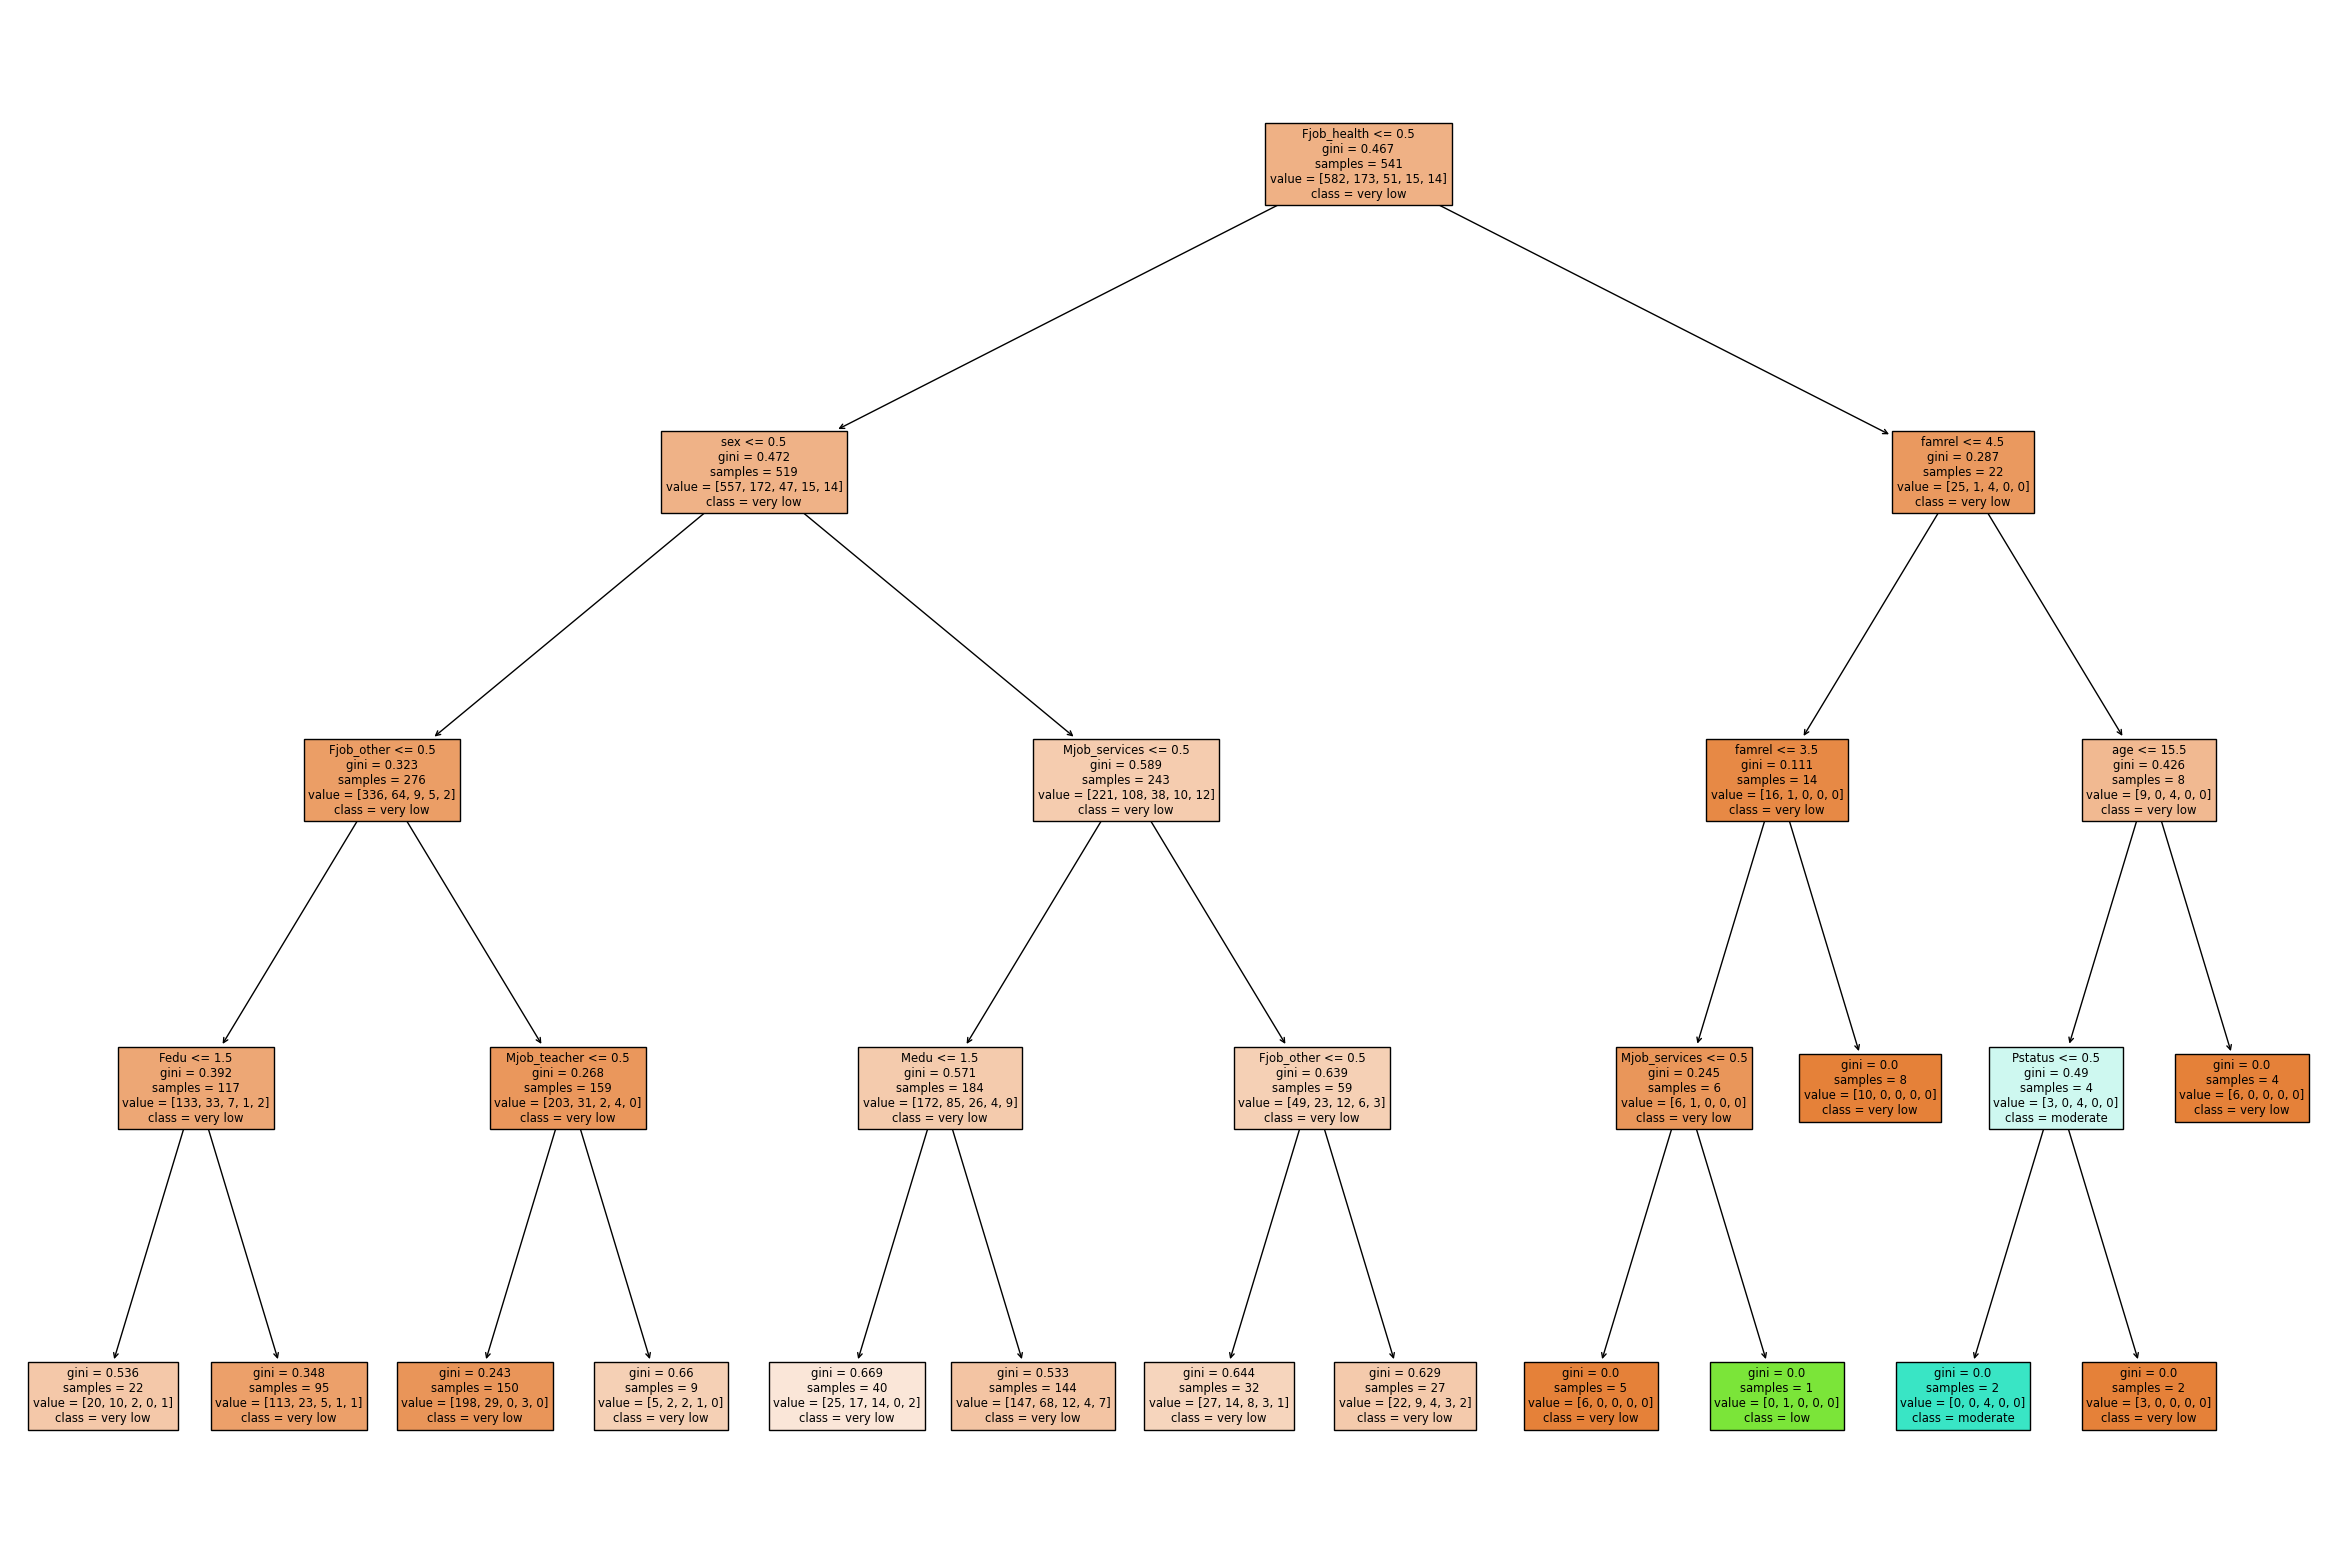

In [13]:
tree_to_plot = 2  

plt.figure(figsize=(30,20))
plt.rcParams['lines.linewidth'] = 0.3
plot_tree(clf.estimators_[tree_to_plot], feature_names=feature_names, filled=True, class_names=class_names)